## 创建数据集

In [1]:
# 导入mxnet
import random
import mxnet as mx

# 导入mxnet的gluon, ndarray, autograd
from mxnet import gluon
from mxnet import autograd
from mxnet import ndarray as nd

# 设置随机种子
mx.random.seed(1)
random.seed(1)

# 训练数据的维度
num_inputs = 2

# 训练数据的样本数量
num_examples = 1000

# 实际的权重w
true_w = [2, -3.4]

# 实际的偏置b
true_b = 4.2

# 随机生成均值为0, 方差为1, 服从正态分布的训练数据X, 
X = nd.random_normal(shape=(num_examples, num_inputs))

# 根据X, w, b生成对应的输出y
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b 

# 给y加上随机噪声
y += 0.01 * nd.random_normal(shape=y.shape)

## 数据展示

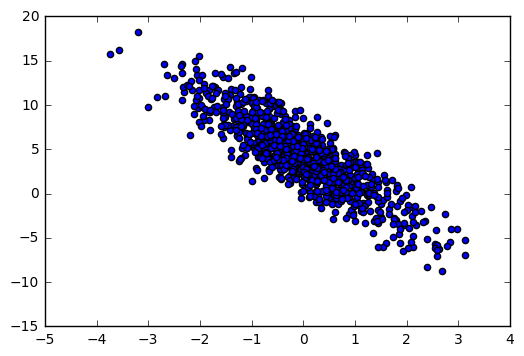

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# 绘制数据的散点图 
plt.scatter(X[:, 1].asnumpy(), y.asnumpy())
plt.show()

## 数据读取

In [3]:
# 训练时的批数据大小
batch_size = 10

# 创建数据集
dataset = gluon.data.ArrayDataset(X, y)

# 读取数据
data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True)

In [4]:
# 查看数据
for data, label in data_iter:
    print data, label
    break


[[-2.11255503  0.61242002]
 [ 2.18546367 -0.48856559]
 [ 0.91085583  0.38985687]
 [-0.56097323  1.44421673]
 [ 0.31765923 -1.75729597]
 [-0.57738042  2.03963804]
 [-0.91808975  0.64181799]
 [-0.20269176  0.21012937]
 [-0.22549874  0.19895147]
 [ 1.42844415  0.06982213]]
<NDArray 10x2 @cpu(0)> 
[ -2.11691356  10.22533131   4.70613146  -1.82755637  10.82125568
  -3.88111711   0.17608714   3.07074499   3.06542921   6.82972908]
<NDArray 10 @cpu(0)>


## 定义模型

In [5]:
# 定义一个空的模型
net = gluon.nn.Sequential()

# 加入一个Dense层
net.add(gluon.nn.Dense(1))

## 初始化模型参数

In [6]:
net.initialize()

## 定义损失函数

In [7]:
square_loss = gluon.loss.L2Loss()

## 优化

In [8]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})

## 训练

In [9]:
# 定义训练的迭代周期
epochs = 5

# 训练
for epoch in xrange(epochs):
    # 总的loss
    total_loss = 0
    for data, label in data_iter:
        # 记录梯度
        with autograd.record():
            # 计算预测值
            output = net(data)
            # 计算loss
            loss = square_loss(output, label)
        # 根据loss进行反向传播计算梯度
        loss.backward()
        # 更新权重, batch_size用来进行梯度平均
        trainer.step(batch_size)
        # 计算总的loss
        total_loss += nd.sum(loss).asscalar()
        
    print "Epoch %d, average loss: %f" % (epoch, total_loss/num_examples)

Epoch 0, average loss: 7.403182
Epoch 1, average loss: 0.854247
Epoch 2, average loss: 0.099864
Epoch 3, average loss: 0.011887
Epoch 4, average loss: 0.001479


## 参考资料

* ArrayDataset  
[https://mxnet.incubator.apache.org/api/python/gluon/data.html#mxnet.gluon.data.ArrayDataset](https://mxnet.incubator.apache.org/api/python/gluon/data.html#mxnet.gluon.data.ArrayDataset)  

* DataLoader  
[https://mxnet.incubator.apache.org/api/python/gluon/data.html?highlight=dataload#mxnet.gluon.data.DataLoader](https://mxnet.incubator.apache.org/api/python/gluon/data.html?highlight=dataload#mxnet.gluon.data.DataLoader)  

* Sequential  
[https://mxnet.incubator.apache.org/api/python/gluon/gluon.html?highlight=gluon.nn.sequential#mxnet.gluon.nn.Sequential](https://mxnet.incubator.apache.org/api/python/gluon/gluon.html?highlight=gluon.nn.sequential#mxnet.gluon.nn.Sequential)  

* L2Loss  
[https://mxnet.incubator.apache.org/api/python/gluon/loss.html?highlight=l2loss#mxnet.gluon.loss.L2Loss](https://mxnet.incubator.apache.org/api/python/gluon/loss.html?highlight=l2loss#mxnet.gluon.loss.L2Loss)  

* Trainer  
[https://mxnet.incubator.apache.org/api/python/gluon/gluon.html?highlight=trainer#mxnet.gluon.Trainer](https://mxnet.incubator.apache.org/api/python/gluon/gluon.html?highlight=trainer#mxnet.gluon.Trainer)  